In [1]:
# Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

## Load the data using Python Pandas library.

In [2]:
## Titanic dataset
train_df = pd.read_csv("train.csv")   
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Do Exploratory Data Analysis of the data and state your insights.

In [5]:
#total number of data present in train data 
train_df.shape

(891, 12)

In [6]:
#info of Train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
#total number of data present in test data 
test_df.shape

(418, 11)

In [8]:
#info of test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
#check the null value in train data
train_df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
#lets see if there are any more columns with missing values 
null_columns=train_df.columns[train_df.isnull().any()]
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#In training data the null values are present in the column 'Age' , 'Cabin' and 'Embarked'

In [12]:
#check the null values in test data
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [13]:
#In test data the null values are present in column 'Age','Cabin' and 'Embarked'

In [14]:
#type of train and test data
train_df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
#finding the categorical variables 
categorical = train_df.dtypes[train_df.dtypes == 'object'].index
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [17]:
#using describe on train data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
#from the above describe of training data in infers that  our problem description mentions 38% survival rate.

In [19]:
#describe only categorical
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allison, Master. Hudson Trevor",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [20]:
#from above
#Names are unique across the dataset (count=unique=891)
#Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
#Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
#Embarked takes three possible values. S port used by most passengers (top=S)
#Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [21]:
#lets remove the null values from the training data set for visualisation 
train_df1 = train_df.dropna()

In [22]:
train_df1.shape

(183, 12)

## Part 2:

Treat “Survived” as your Dependent Variable and rest of the columns as
Independent Variable.

● Create Scatter Plot of Independent Variable vs Dependent Variable.

● Based on Scatter Plot see if there is any transformation required for Independent Variable.

● Build a Logistic Regression model.

● Get the accuracy score.

In [23]:
## To get a figure with proper structure

fig = plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

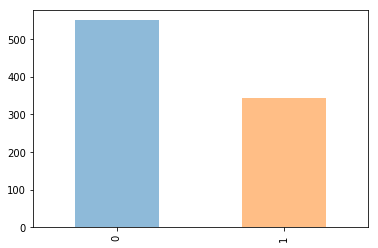

In [24]:
 ## Setting alpha as per transparency
train_df.Survived.value_counts().plot(kind="bar",alpha=0.5) 

We can obviously see that approximate of 350 people survived and 550 people died. 

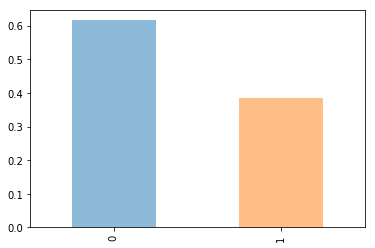

In [25]:
train_df.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency

So from here we can see 40% people survived and 60% of people died.

Since we have all age of the passengers, we can see the relationship between age and survival rate. 
Here as we gonna plot two different attributes scatter plot will do

Text(0.5,1,'Age wrt Survived')

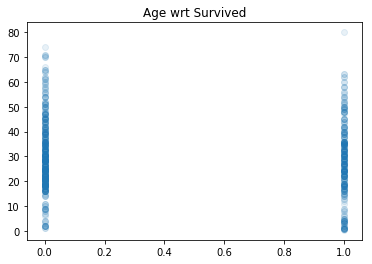

In [26]:
 ## here the plot has to be transparent so we need to pic low alpha value
plt.scatter(train_df.Survived, train_df.Age, alpha=0.1)  
plt.title("Age wrt Survived")

So From the above we can understand that, some of the older people died (between 50-70) and some of the younger people
(between 20-40) survived more.

Relationship between Fare and Survived

Text(0.5,1,'Fare wrt Survived')

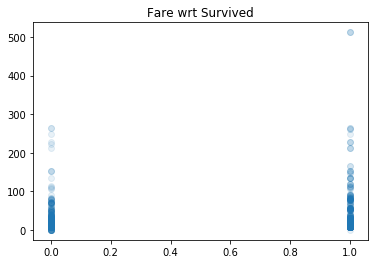

In [27]:
 ## here the plot has to be transparent so we need to pic low alpha value
plt.scatter(train_df.Survived, train_df.Fare, alpha=0.1)  
plt.title("Fare wrt Survived")

So From the above we can understand that, people with the paying higer fare or lower fare the count of the survival 
is almost same. 

People with the fare ranging from 0 to 100 $ survived more than people with fare above 500 $. 

Relationship between Sibblings and Survived

Text(0.5,1,'Sibblils wrt Survived')

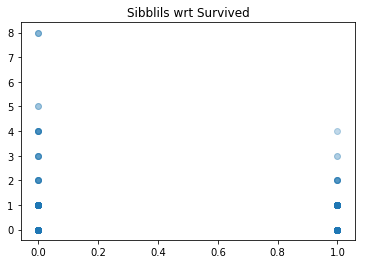

In [28]:
plt.scatter(train_df.Survived,train_df.SibSp,alpha=0.1)
plt.title("Sibblils wrt Survived")

#### Lets have a look at the counts plot of passenger class.

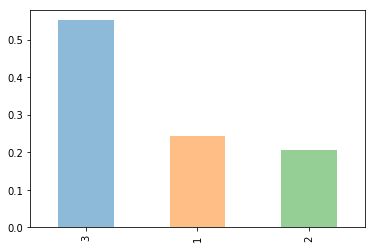

In [29]:
train_df.Pclass.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

So From the above we infered that 55% of people are from 3rd class and 25% and 20% from the rest.

#### Let's correlate passenger class with passengers age.

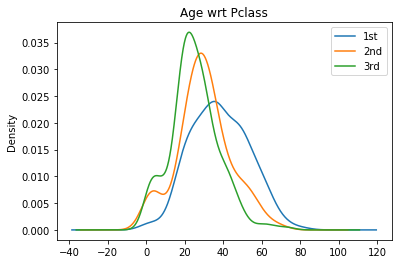

In [30]:
for x in [1,2,3]:    ## for 3 classes
    train_df.Age[train_df.Pclass == x].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.legend(("1st","2nd","3rd"))

From the above we can conclude that more older people are from 1st class than that of 2nd and 3rd which is obvious.
Atlast lets plot embarked feature.

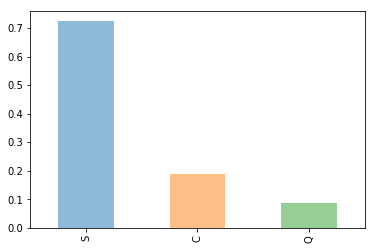

In [31]:
train_df.Embarked.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)


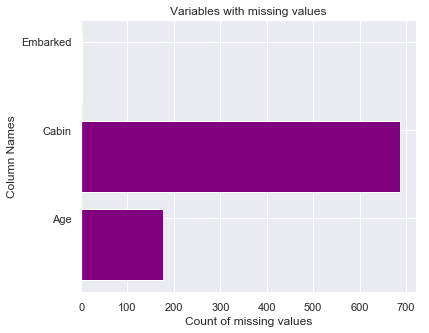

In [32]:
sns.set(font_scale=1)

#pd.options.display.mpl_style = 'default'
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(train_df[col].isnull().sum())
ind = np.arange(len(labels))
ind
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

### Visualizations

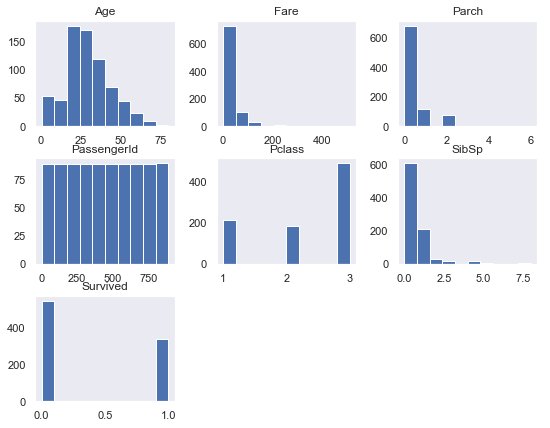

In [33]:
train_df.hist(bins=10,figsize=(9,7),grid=False);

we can see that Age and Fare are measured on very different scaling. So we need to do feature scaling before predictions.

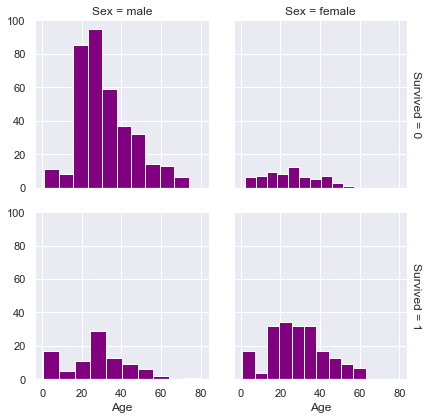

In [34]:
g = sns.FacetGrid(train_df, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

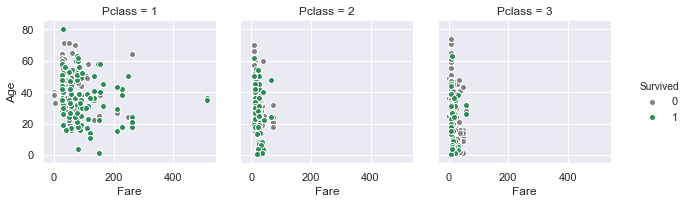

In [35]:
g = sns.FacetGrid(train_df, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

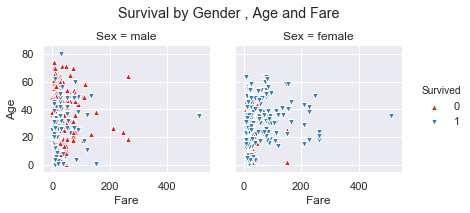

In [36]:
g = sns.FacetGrid(train_df, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

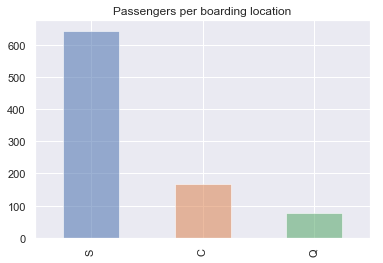

In [37]:
train_df.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

F:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


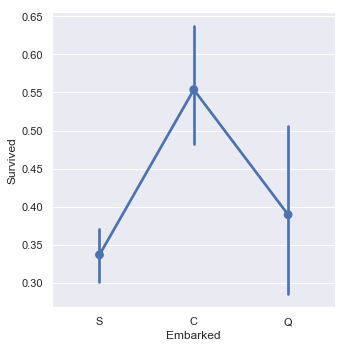

In [38]:
sns.factorplot(x = 'Embarked',y="Survived", data = train_df,color="b");

F:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


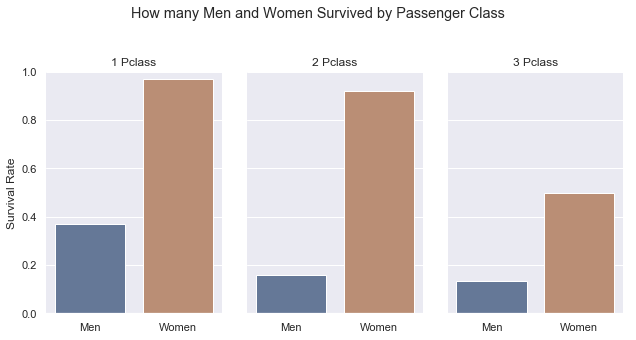

In [39]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=train_df, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

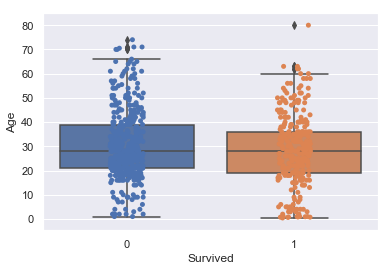

In [40]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=train_df)
ax = sns.stripplot(x="Survived", y="Age",
                   data=train_df, jitter=True,
                   edgecolor="gray")
#sns.l("Survival by Age",fontsize=12);

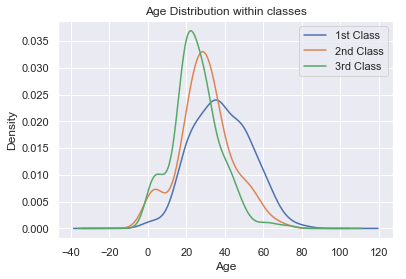

In [41]:
train_df.Age[train_df.Pclass == 1].plot(kind='kde')    
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

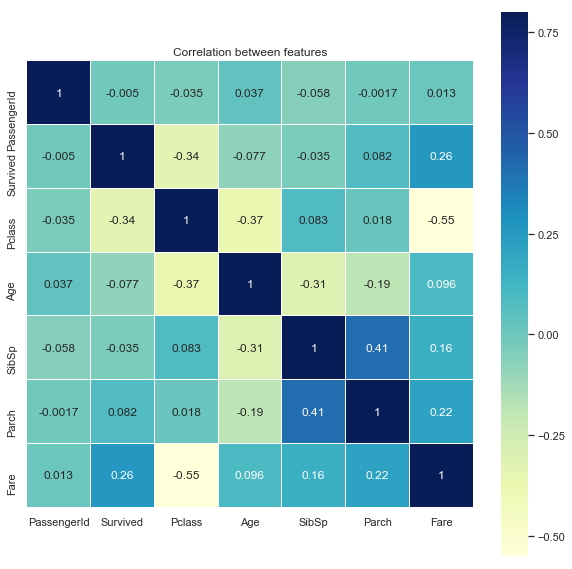

In [42]:
corr=train_df.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [43]:
#correlation of features with target variable
train_df.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

Looks like Pclass has got highest negative correlation with "Survived" followed by Fare, Parch and Age

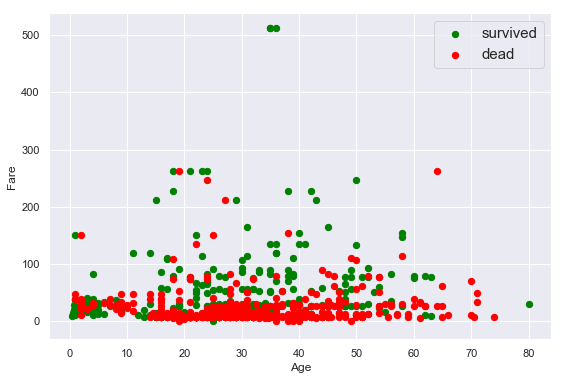

In [44]:
##### Age Vs Fare Vs Survival ####
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.scatter(train_df[train_df['Survived']==1]['Age'],train_df[train_df['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train_df[train_df['Survived']==0]['Age'],train_df[train_df['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

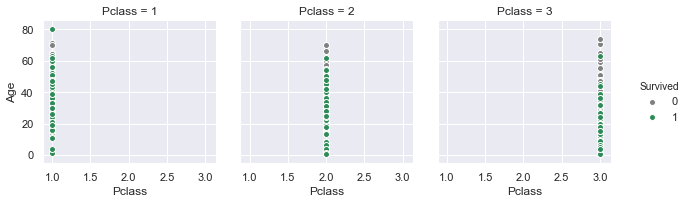

In [45]:
g = sns.FacetGrid(train_df, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Pclass","Age",edgecolor="w").add_legend();

F:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
F:\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


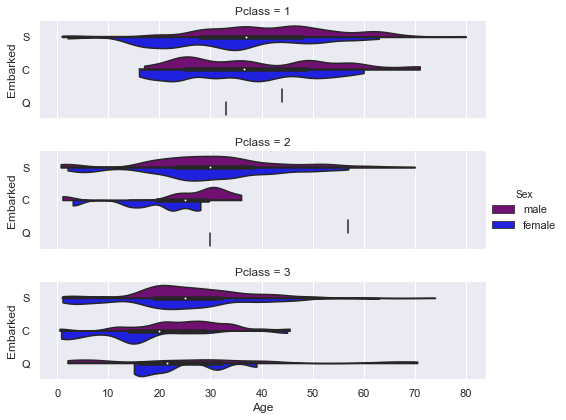

In [46]:
g = sns.factorplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=train_df[train_df.Embarked.notnull()],
                    orient="h", size=2, aspect=3.5, 
                   palette={'male':"purple", 'female':"blue"},
                    kind="violin", split=True, cut=0, bw=.2);

## Missing Value Imputation 

In [47]:
train_df1=train_df.copy()
test_df1=test_df.copy()

In [48]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
test_df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
#combine the train and test data to change the categorical coulmns into numerical 

combine = [train_df1, test_df1]

In [51]:
train_df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
#Categorical variable treating

train_df1.describe(include='O')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allison, Master. Hudson Trevor",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [54]:
#sex column has 2 unique values . 
train_df1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [55]:
#lets convert male=0 and female=1. 
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0})

In [56]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [57]:
#Embarked column has 3 unique values
train_df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [59]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)  #fillna('S')
    
#train_df2[['Embarked', 'Survived']].groupby(['Embarked'], as_index= False).mean().sort_values(by='Embarked', ascending=True)

In [60]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [61]:
#Let's convert S=0,C=1 and Q=2
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    


In [62]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int32
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 80.1+ KB


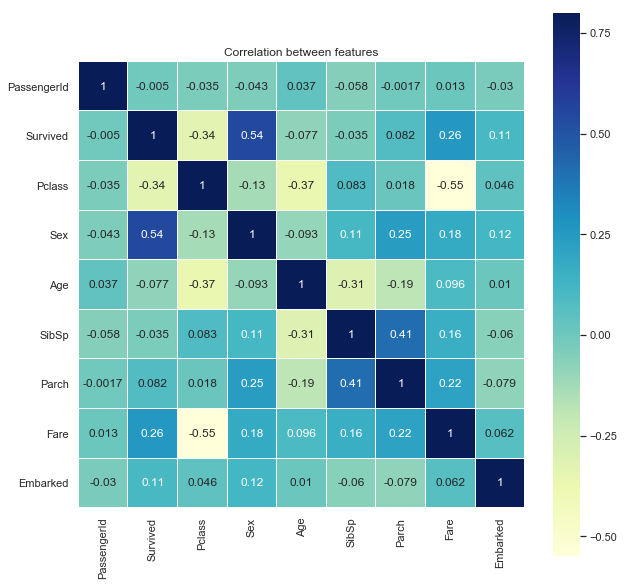

In [63]:
corr=train_df1.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [64]:
#Let's impute the missing value in Age column 

#We can consider three methods to complete a numerical continuous feature.

#A simple way is to generate random numbers between mean and standard deviation.

#More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, 
#Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. 
#So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

#Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard 
#deviation, based on sets of Pclass and Gender combinations.

#Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer 
#method 2.

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


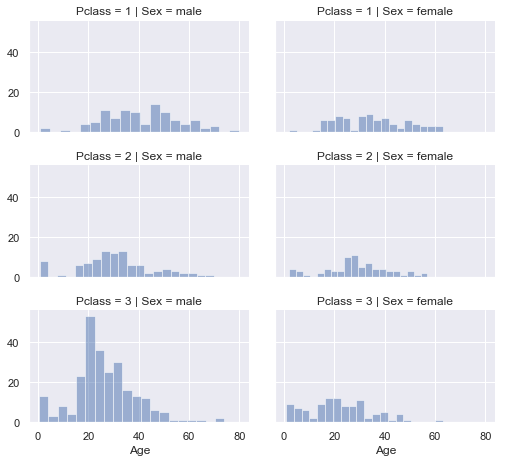

In [65]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col ='Sex', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()

In [66]:
#Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations

In [67]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [68]:
#Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations

In [69]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
           #print(guess_df)
            # age_mean = guess_df.mean()  ## dist fill
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_df.median()
            print(age_guess)
            guess_ages[i,j] =int(age_guess/0.5 + 0.5)*0.5

40.0
30.0
25.0
35.0
28.0
21.5
42.0
28.0
24.0
41.0
24.0
22.0


In [70]:
guess_ages

array([[42., 28., 24.],
       [41., 24., 22.]])

In [71]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age']=guess_ages[i,j]
    dataset['Age'] =  dataset['Age'].astype(int)

In [72]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0


In [73]:
train_df1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [74]:
#Let us create Age bands and determine correlations with Survived.

In [75]:
train_df1['AgeBand'] = pd.cut(train_df1['Age'], 5)
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"


In [76]:
test_df1['AgeBand']=pd.cut(test_df1['Age'],5)
test_df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,NaN,2,"(30.4, 45.6]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,0,"(45.6, 60.8]"
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,NaN,2,"(60.8, 76.0]"
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,NaN,0,"(15.2, 30.4]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,0,"(15.2, 30.4]"


In [77]:
train_df1[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [78]:
# Let us replace Age with ordinals based on these bands

In [79]:
for dataset in combine:
    dataset.loc[dataset.Age<=16,'Age']=0
    dataset.loc[((dataset.Age>16) & (dataset.Age<=32)),'Age']=1
    dataset.loc[((dataset.Age>32) & (dataset.Age<=48)),'Age']=2
    dataset.loc[((dataset.Age>48) & (dataset.Age<=64)),'Age']=3
    dataset.loc[((dataset.Age>64) & (dataset.Age<=80)),'Age']=4

train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"


In [80]:
test_df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,"(30.4, 45.6]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,7.0000,NaN,0,"(45.6, 60.8]"
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2,"(60.8, 76.0]"
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,0,"(15.2, 30.4]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,"(15.2, 30.4]"


In [81]:
train_df1.Age.isnull().any()

False

In [82]:
for dataset in combine:
    print(dataset.dtypes)

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age               int32
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked          int32
AgeBand        category
dtype: object
PassengerId       int64
Pclass            int64
Name             object
Sex               int64
Age               int32
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked          int32
AgeBand        category
dtype: object


In [83]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"


In [84]:
train_df1['Age'].value_counts()

1    495
2    216
0    100
3     69
4     11
Name: Age, dtype: int64

In [85]:
#train_df1=train_df1.drop(['PassengerId'],axis=1)
#test_df1=test_df1.drop(['PassengerId'],axis=1)

In [86]:
train_df1.describe(include='O')

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Allison, Master. Hudson Trevor",CA. 2343,G6
freq,1,7,4


In [87]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"


In [88]:
for dataset in combine:
    dataset=dataset.drop(['AgeBand'],axis=1)

In [89]:
train_df1.drop(['AgeBand'],axis=1,inplace=True)

In [90]:
test_df1.drop(['AgeBand'],axis=1,inplace=True)

In [91]:
# Create new feature combining existing features
# We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp 
# from our datasets.

In [92]:
train_df1['FamilySize']=train_df1['SibSp']+train_df1['Parch']+1
test_df1['FamilySize']=test_df1['SibSp']+test_df1['SibSp']+1

In [93]:
combine = [train_df1,test_df1]

In [94]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1


In [95]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1


In [96]:
test_df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,7.0000,NaN,0,3
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,3


In [97]:
train_df1[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=False)

,FamilySize,Survived
8,11,0.000000
7,8,0.000000
6,7,0.333333
5,6,0.136364
4,5,0.200000
3,4,0.724138
2,3,0.578431
1,2,0.552795
0,1,0.303538


In [98]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df1[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index= False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [99]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,1


In [100]:
test_df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,7.0000,NaN,0,3,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2,1,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,3,0


In [101]:
#Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

train_df1.drop(['FamilySize','Parch','SibSp'],axis=1,inplace=True)
test_df1.drop(['FamilySize','Parch','SibSp'],axis=1,inplace=True)

In [102]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,PC 17599,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,113803,53.1000,C123,0,0
4,5,0,3,"Allen, Mr. William Henry",0,2,373450,8.0500,NaN,0,1


In [103]:
combine = [train_df1,test_df1]

In [104]:
#We can also create an artificial feature combining Pclass and Age.
for dataset in combine:
    dataset['Age*Class'] = dataset.Age*dataset.Pclass

train_df1.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [105]:
test_df1.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,6,2,3
1,6,2,3
2,6,3,2
3,3,1,3
4,3,1,3


In [106]:
#Quick completing and converting a numeric feature
#We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs 
#most frequently for this feature. We do this in a single line of code.

#Note that we are not creating an intermediate new feature or doing any further analysis for correlation to
#guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for
#model algorithm to operate on non-null values.

#We may also want round off the fare to two decimals as it represents currency.

In [107]:
test_df1.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
Ticket         False
Fare            True
Cabin           True
Embarked       False
IsAlone        False
Age*Class      False
dtype: bool

In [108]:
train_df1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
Ticket         False
Fare           False
Cabin           True
Embarked       False
IsAlone        False
Age*Class      False
dtype: bool

In [109]:
#missing value imputation for Fare for test data 
test_df1['Fare'].fillna(test_df1['Fare'].dropna().median() ,inplace=True)

test_df1.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
Ticket         False
Fare           False
Cabin           True
Embarked       False
IsAlone        False
Age*Class      False
dtype: bool

In [110]:
##We can now create FareBand.

train_df1['FareBand']=pd.cut(train_df1['Fare'],4)
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Age*Class,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,A/5 21171,7.2500,NaN,0,0,3,"(-0.512, 128.082]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,PC 17599,71.2833,C85,1,0,2,"(-0.512, 128.082]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,STON/O2. 3101282,7.9250,NaN,0,1,3,"(-0.512, 128.082]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,113803,53.1000,C123,0,0,2,"(-0.512, 128.082]"
4,5,0,3,"Allen, Mr. William Henry",0,2,373450,8.0500,NaN,0,1,6,"(-0.512, 128.082]"


In [111]:
train_df1[['FareBand','Survived']].groupby('FareBand',as_index = False).mean().sort_values(by = 'FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [112]:
test_df1['FareBand']=pd.cut(test_df1['Fare'],4)

In [113]:
combine=[train_df1,test_df1]

In [114]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [115]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int32
Ticket         891 non-null object
Fare           891 non-null int32
Cabin          204 non-null object
Embarked       891 non-null int32
IsAlone        891 non-null int64
Age*Class      891 non-null int64
FareBand       891 non-null category
dtypes: category(1), int32(3), int64(6), object(3)
memory usage: 74.1+ KB


In [116]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null int32
Ticket         418 non-null object
Fare           418 non-null int32
Cabin          91 non-null object
Embarked       418 non-null int32
IsAlone        418 non-null int64
Age*Class      418 non-null int64
FareBand       418 non-null category
dtypes: category(1), int32(3), int64(5), object(3)
memory usage: 31.6+ KB


In [117]:
#Drop the Fareband column 
train_df1.drop(['FareBand'],axis=1,inplace=True)
test_df1.drop(['FareBand'],axis=1,inplace=True)

In [118]:
# creating new feature with Name

In [119]:
combine=[train_df1,test_df1]

In [120]:
# The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. 
# The expand=False flag returns a DataFrame.

In [121]:
for dataset in combine: #combine is a list, iterable
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
#pd.crosstab(train_df['Title'], train_df['Sex'])  #traind_df doesnot have 'Title' column, iteration has taken place in -- combine
#pd.crosstab(combine[0]['Title'], combine[0]['Sex'])

In [122]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Age*Class,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,A/5 21171,0,NaN,0,0,3,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,PC 17599,3,C85,1,0,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,1,STON/O2. 3101282,1,NaN,0,1,3,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,113803,3,C123,0,0,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,2,373450,1,NaN,0,1,6,Mr


In [123]:
test_df1.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Age*Class,Title
0,892,3,"Kelly, Mr. James",0,2,330911,0,NaN,2,1,6,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,363272,0,NaN,0,0,6,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,3,240276,1,NaN,2,1,6,Mr
3,895,3,"Wirz, Mr. Albert",0,1,315154,1,NaN,0,1,3,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,1,NaN,0,0,3,Mrs


In [124]:
train_df1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
Ticket         False
Fare           False
Cabin           True
Embarked       False
IsAlone        False
Age*Class      False
Title          False
dtype: bool

In [125]:
test_df1.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
Ticket         False
Fare           False
Cabin           True
Embarked       False
IsAlone        False
Age*Class      False
Title          False
dtype: bool

In [126]:
#let's check the unique number of Title based on Sex 
pd.crosstab(combine[0]['Title'], combine[0]['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [127]:
#we can combine the Title based on the counts 

# 'Lady', 'Countess', 'Capt', 'Col','Don',  'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona' as Rare 
#'Mlle' , 'Ms' to 'Miss'
#'Mme' to 'Mrs'


In [128]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don',  'Dr', 'Major', 'Rev', 'Sir', 
                                               'Jonkheer', 'Dona' ],'Rare')
    dataset['Title']=dataset['Title'].replace(['Mlle' , 'Ms'] ,'Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

In [129]:
pd.crosstab(train_df1['Title'], combine[0]['Sex'])

Sex,0,1
Title,,
Master,40,0
Miss,0,185
Mr,517,0
Mrs,0,126
Rare,20,3


In [130]:
train_df1[['Title','Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [131]:
#Let's change the categorical variable Titile based on the unique 5 values
train_df1['Title'],lable=pd.factorize(train_df1['Title'])


In [132]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Age*Class,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,A/5 21171,0,NaN,0,0,3,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,PC 17599,3,C85,1,0,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,STON/O2. 3101282,1,NaN,0,1,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,113803,3,C123,0,0,2,1
4,5,0,3,"Allen, Mr. William Henry",0,2,373450,1,NaN,0,1,6,0


In [133]:
test_df1['Title'],labels = pd.factorize(test_df1['Title'])

In [134]:
#Let's drop Name column 

train_df1.drop(['Name'],axis=1,inplace=True)
test_df1.drop(['Name'],axis=1,inplace=True)

In [135]:
train_df1.describe(include='O')

,Ticket,Cabin
count,891,204
unique,681,147
top,CA. 2343,G6
freq,7,4


In [136]:
#since ticket has more number of unique values we can remove this feature
#SInce Cabin count is very low we out of 891 only 204 cabin count 204/891 only 22% is
    #filled we can remove this feature for predicting the survival rate 
#PassengerId only used to represent the unique row in the dataset. So we can remove this also 

In [137]:
#Let's drop Ticket , Cabin, PassengerId as discussed above 

train_df1.drop(['Ticket','Cabin','PassengerId'],axis=1,inplace=True)
test_df1.drop(['Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [138]:
train_df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class,Title
0,0,3,0,1,0,0,0,3,0
1,1,1,1,2,3,1,0,2,1
2,1,3,1,1,1,0,1,3,2
3,1,1,1,2,3,0,0,2,1
4,0,3,0,2,1,0,1,6,0


In [139]:
test_df1.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class,Title
0,3,0,2,0,2,1,6,0
1,3,1,2,0,0,0,6,1
2,2,0,3,1,2,1,6,0
3,3,0,1,1,0,1,3,0
4,3,1,1,1,0,0,3,1


In [140]:
#lets see the correlation between independent and dependent variables.

#Passenger_ID is the unique identity of the each raw in the titanic set.
#So we will not use Passenger ID as a feature for predicting the survival rate 

independent_features = ['Pclass','Sex','Age','Fare','Embarked','IsAlone','Age*Class','Title']


In [141]:
for f in independent_features:
    corr_score = train_df1['Survived'].corr(train_df1[f])
    print(f+'::'+str(corr_score))

Pclass::-0.3384810359610148
Sex::0.5433513806577546
Age::-0.037059283801258475
Fare::0.29587535255977243
Embarked::0.10681138570891942
IsAlone::-0.20336708569989204
Age*Class::-0.27100793862236194
Title::0.40592106451287685


## Model Building and Prediction 

In [142]:
X_train = train_df1.drop("Survived", axis=1)
Y_train = train_df1["Survived"]
X_test  = test_df1.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [143]:
# Logistic Regression
LogR = LogisticRegression()
LogR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
acc_LogR = LogR.score(X_train, Y_train)
acc_LogR

0.7957351290684624

In [145]:
Y_pred = LogR.predict(X_test)

In [146]:
LogR.score(X_test, Y_pred)

1.0

In [147]:
LogR.coef_

array([[-1.0459937 ,  2.2309452 , -0.32166562,  0.01911013,  0.25702   ,
         0.10438598, -0.06688933,  0.26353067]])

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most. Inversely as Pclass increases, probability of Survived=1 decreases the most. This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived. So is Title as second highest positive correlation.

In [148]:
coeff_df = pd.DataFrame(train_df1.columns.delete(0))
coeff_df.columns = ['Feature']  

In [149]:
coeff_df['Feature'] = pd.Series(train_df1.columns.delete(0))
coeff_df["Correlation"] = pd.Series(LogR.coef_[0])


In [150]:
coeff_df

,Feature,Correlation
0,Pclass,-1.045994
1,Sex,2.230945
2,Age,-0.321666
3,Fare,0.019110
4,Embarked,0.257020
5,IsAlone,0.104386
6,Age*Class,-0.066889
7,Title,0.263531


In [151]:
coeff_df.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.230945
7,Title,0.263531
4,Embarked,0.257020
5,IsAlone,0.104386
3,Fare,0.019110
6,Age*Class,-0.066889
2,Age,-0.321666
0,Pclass,-1.045994
